In [ ]:
import numpy as np
import astropy as ap
from astropy.io import fits
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import scipy as sp
from astropy import units as u
import pandas as pd
plt.rcParams["figure.figsize"] = (25,10)

This is the Beginning of a short Series of Jupyter Notebooks where we explore the Discovery of Exoplanets with the help of the Transit method. In this first Notebook we will start of with a very rudimentary aproach to finding the Transits. We will explore these concepts with the Data from Pi Mensae c gathered by the TESS Survey. The Data can be found and downloaded on [TESS Data Reports](https://archive.stsci.edu/prepds/tess-data-alerts/#dataaccess).

Now let us start with loading the Downloaded data with the Help of the Astropy Fits Module. The Data of the TESS survey and of many other Surveys are organized in FITS files this stands for Flexible Image Transport System, it is a much used Format in Astronomy Developed by NASA

In [ ]:
Data = fits.open("Data/hlsp_tess-data-alerts_tess_phot_00261136679-s01_tess_v1_lc.fits")#we open the LC file this is the File that allready combined the Pixels of the CCD
#Getting Info about the data in our FITS file
Data.info()

Filename: Data/hlsp_tess-data-alerts_tess_phot_00261136679-s01_tess_v1_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   20076R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 21)   int32   


With the help of this command we can see  that this Fits file contains three different so called HDUs (Header Data Units). The one were interested in is our Lightcurve it contains a Table with the Combined Lightcurve of the the Star Pi Mensae. 
We now print the Header of the Lightcurve HDU which tells us all interesting things we need to Know about the Lightcurve data.

In [ ]:
print("\n Primary Table HDU \n")
display(Data[0].header)
print("\n BIN Table HDU \n")
display(Data[1].header)


 Primary Table HDU 



SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2018-08-27'         / file creation date.                            
TSTART  =    1325.293656167129 / observation start time in TJD                  
TSTOP   =    1353.176978345185 / observation stop time in TJD                   
DATE-OBS= '2018-07-25T19:01:


 BIN Table HDU 



XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                20076 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [ ]:
t0 = Data[1].header["TSTART"] #Starting Time of Measurement

We saved the Starting time so we can remove that later and have the time from the beginning of the Measurement in days. We also now print the Column Names of the Lightcurve Table which is gonna help us now what is in what Column. The Most important Columns for us ure the Time, SAP_FLUX and later the PDCSAP_FLUX

In [ ]:
print("\n Column Names of Data \n")
print(80*"-")
Data[1].data.columns


 Column Names of Data 

--------------------------------------------------------------------------------


ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [ ]:
time = Data[1].data["TIME"] - t0#Time of our Measurements in days 0 point is the start of observation
Flux = Data[1].data["SAP_FLUX"] #SAP Fluxes
FluxPDC = Data[1].data["PDCSAP_FLUX"] #PDC FLuxes

We make a small Plot to oversee how our Data Looks

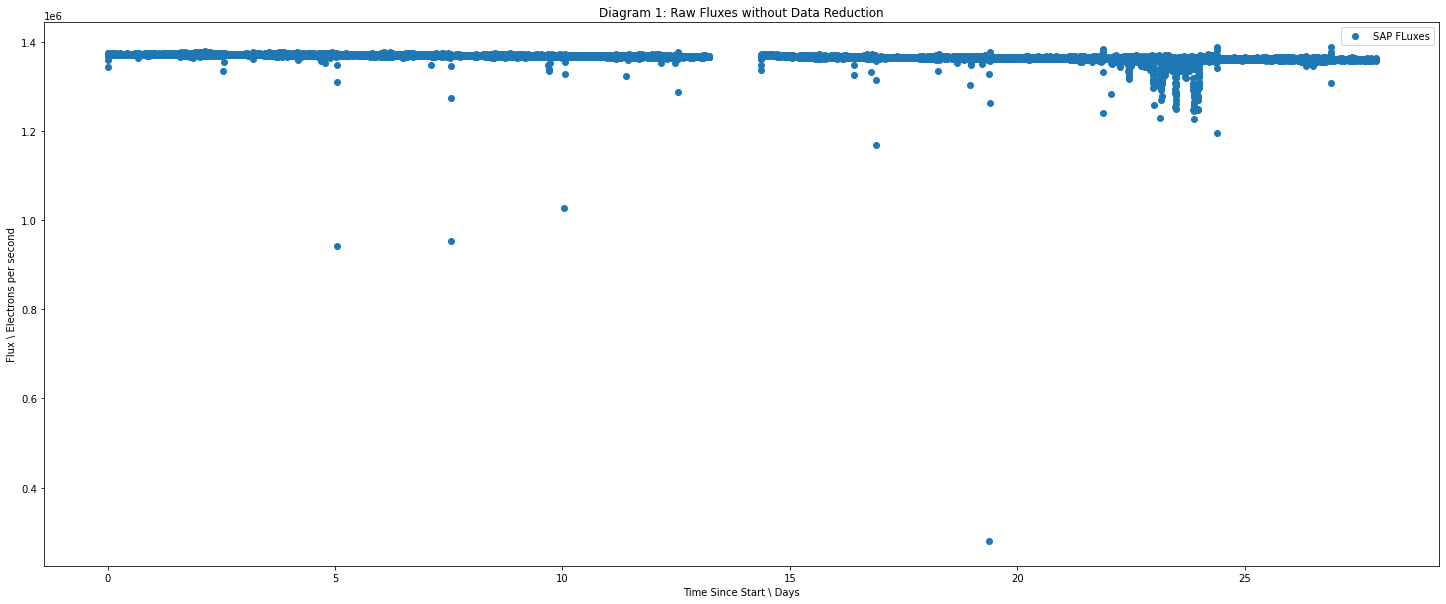

In [ ]:
plt.title("Diagram 1: Raw Fluxes without Data Reduction")
plt.plot(time,Flux,"o",label="SAP FLuxes")
#plt.plot(time,Flux,"x",label="PDC FLuxes",alpha=0.2)
plt.ylabel(r"Flux \ Electrons per second")
plt.xlabel(r"Time Since Start \ Days")
plt.legend()

To find the Transits we need to close in closer to the data and ignore the outliers abit thus we want to zoom in on the y Axis. We also want to remove the NaN values for further Computations, to avoid errors

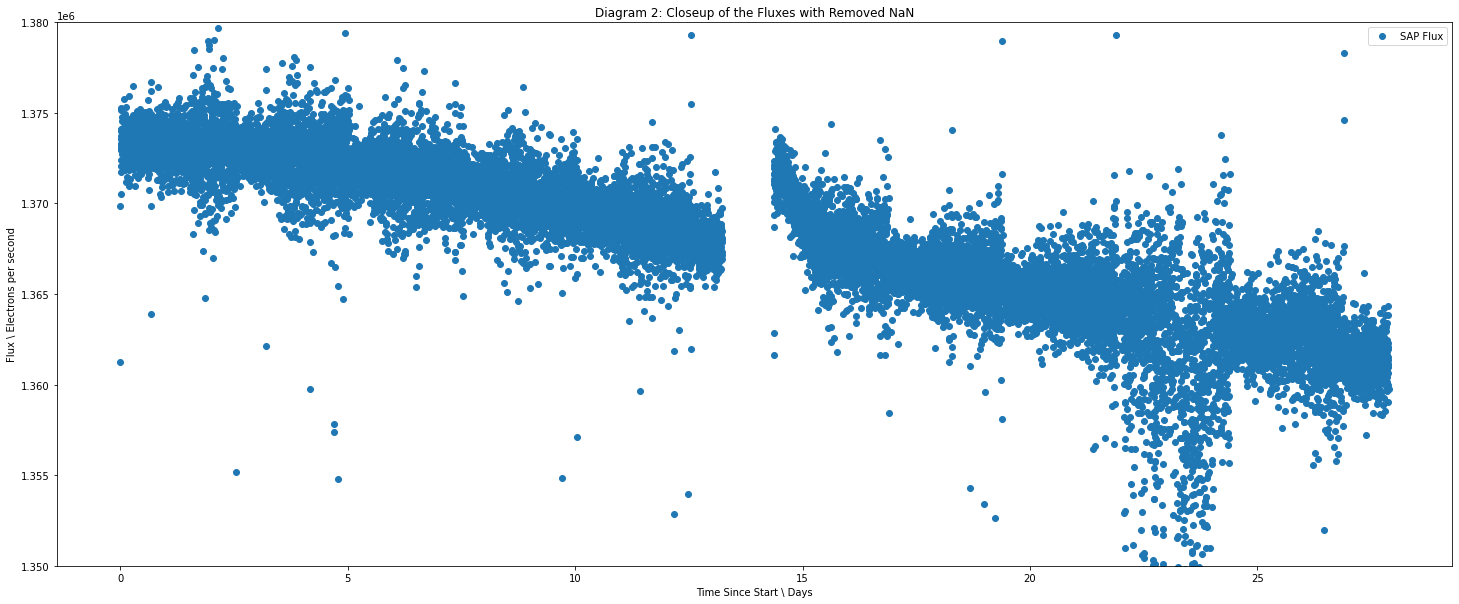

In [ ]:
NoNaN = ~np.isnan(Flux) #Find nan Values in our Flux Array and mask them 
FluxNoNan = Flux[NoNaN]
timeNoNan = time[NoNaN]
plt.title("Diagram 2: Closeup of the Fluxes with Removed NaN")
plt.plot(timeNoNan,FluxNoNan,"o",label="SAP Flux")
plt.ylabel(r"Flux \ Electrons per second")
plt.xlabel(r"Time Since Start \ Days")
#plt.ylim(1.435e6,1.441e6)
plt.ylim(1.35e6,1.38e6)
plt.legend()

In [ ]:
from scipy.signal import savgol_filter
#Flux_Filter = savgol_filter(FluxNoNan,401,2)
#plt.plot(timeNoNan,Flux_Filter,"o")

We now want to correct for the systematic error by fitting an polynomial of order 1 to these Datapoints. And use this to detrend the time series we use advise from [Andrei 2020](https://towardsdatascience.com/removing-non-linear-trends-from-timeseries-data-b21f7567ed51). We use the Linear Model from [SciKit Learn](https://scikit-learn.org/stable/index.html) to fit a 1st and 2nd Order Polynomial

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2) # Second order Polynomial Model a+bx+cx^2
time_p = pf.fit_transform(timeNoNan.reshape(-1,1))
model = linear_model.LinearRegression() #using Linear Regression Model from SciKit Learn a+bx
model.fit(timeNoNan.reshape(-1,1),FluxNoNan)
model_p = linear_model.LinearRegression()
model_p.fit(time_p,FluxNoNan)

trend = model.predict(timeNoNan.reshape(-1,1))
trend_p = model_p.predict(time_p)

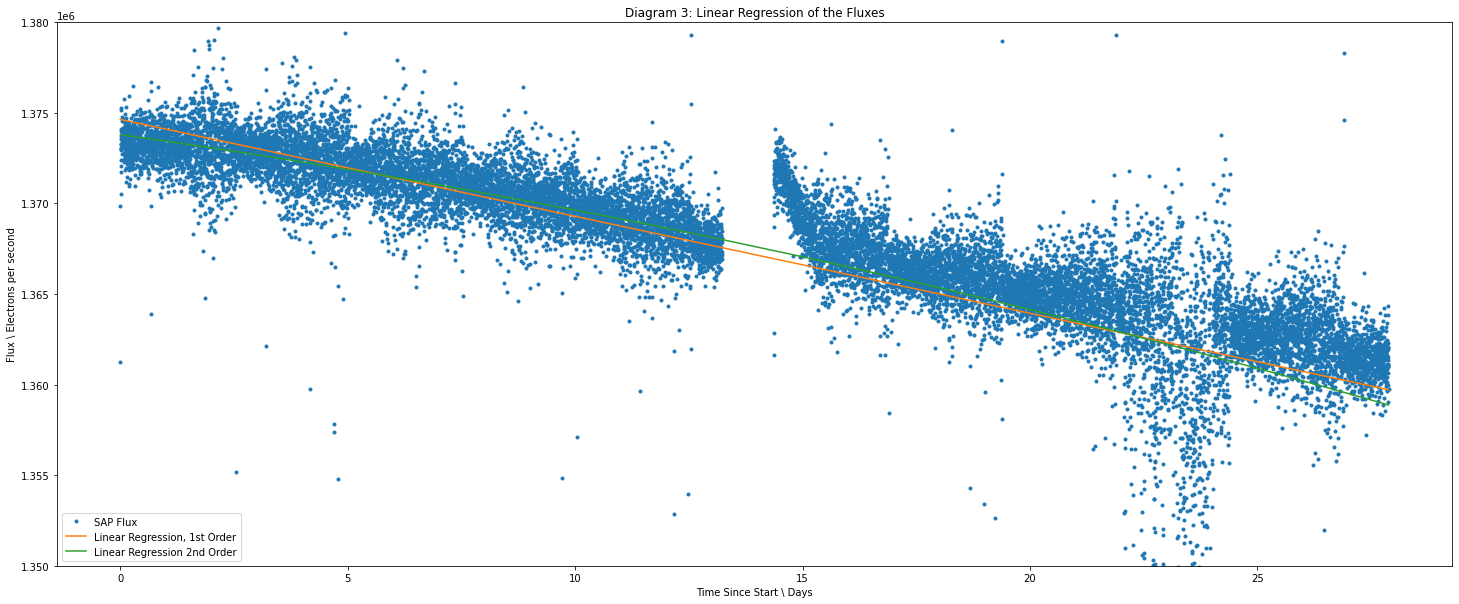

In [ ]:
plt.title("Diagram 3: Linear Regression of the Fluxes")
plt.plot(timeNoNan,FluxNoNan,".",label="SAP Flux")
plt.plot(timeNoNan,trend,label="Linear Regression, 1st Order")
plt.plot(timeNoNan,trend_p,label="Linear Regression 2nd Order")
plt.ylabel(r"Flux \ Electrons per second")
plt.xlabel(r"Time Since Start \ Days")
plt.ylim(1.35e6,1.38e6)
#plt.ylim(1.435e6,1.441e6)
plt.legend()

We now use this regression with the Second Order Polynomial to detrend the Data by simply subtracting the trend from our Data and then we should have our pure data without the trend that is caused by systematic errors.

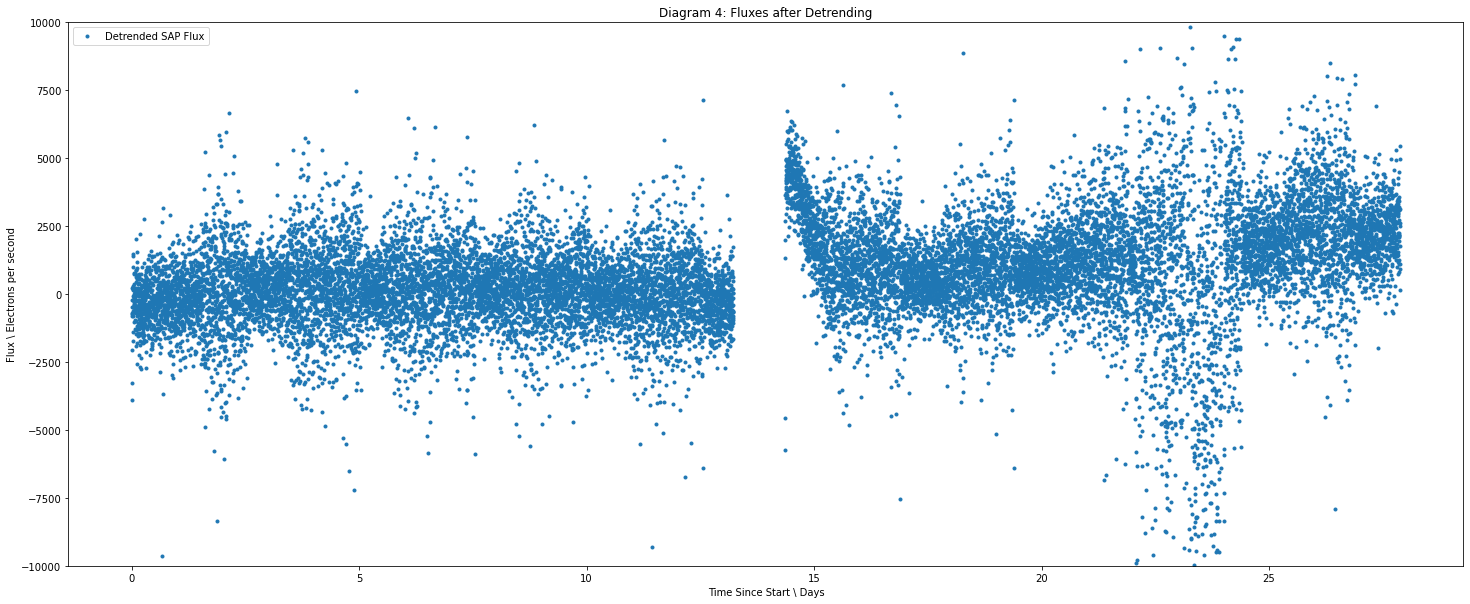

In [ ]:
Flux_detr = FluxNoNan - trend_p
plt.title("Diagram 4: Fluxes after Detrending")
#plt.hlines(0,0,27,"k",zorder=2,label="Flux=0 Line")
plt.plot(timeNoNan,Flux_detr,".",label="Detrended SAP Flux",zorder=1)
plt.ylabel(r"Flux \ Electrons per second")
plt.xlabel(r"Time Since Start \ Days")
plt.ylim(-1e4,1e4)
plt.legend()

We now want to get a better view on the Data therefore we are Filtering the Data using a Savitzky-Golay Filter to get a better view on the transits.

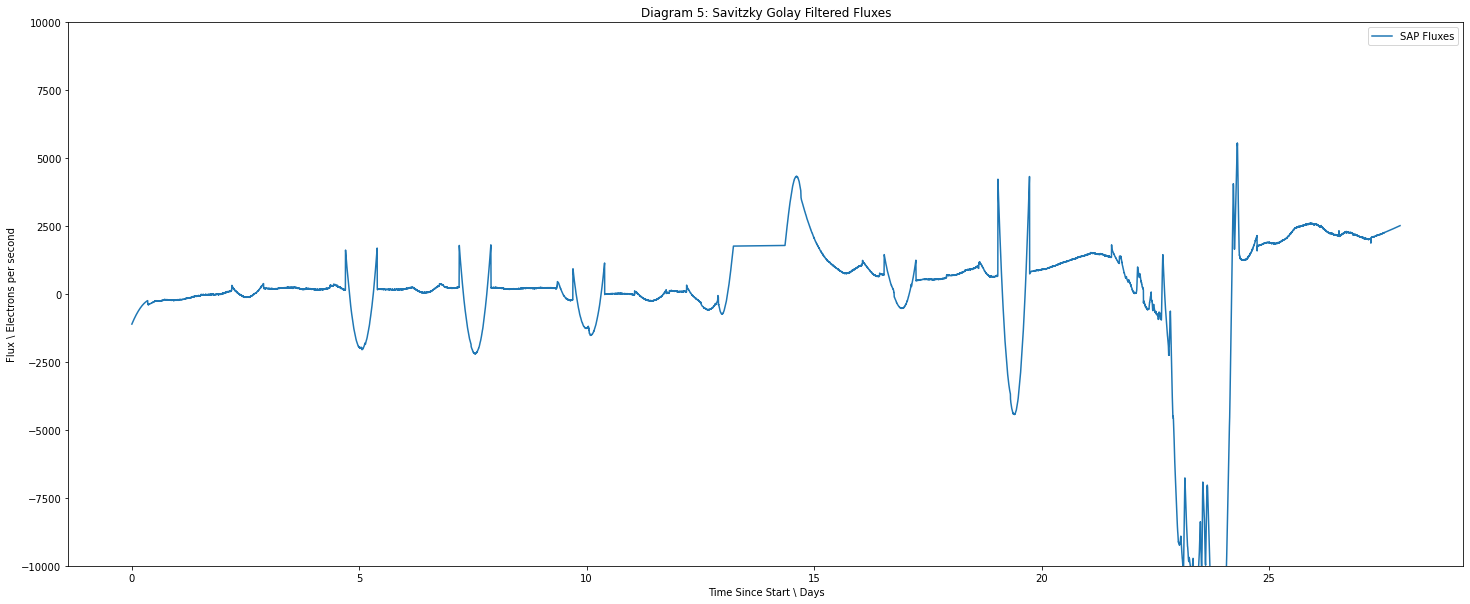

In [ ]:
from scipy.signal import savgol_filter
Flux_Filter = savgol_filter(Flux_detr,501,2)
plt.title("Diagram 5: Savitzky Golay Filtered Fluxes")
plt.plot(timeNoNan,Flux_Filter,"-",label="SAP Fluxes")
plt.ylabel(r"Flux \ Electrons per second")
plt.xlabel(r"Time Since Start \ Days")
plt.ylim(-1e4,1e4)
plt.legend()

Now we try to Bin the data to reduce the amount of Points abit we use [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binned_statistic.html) for that

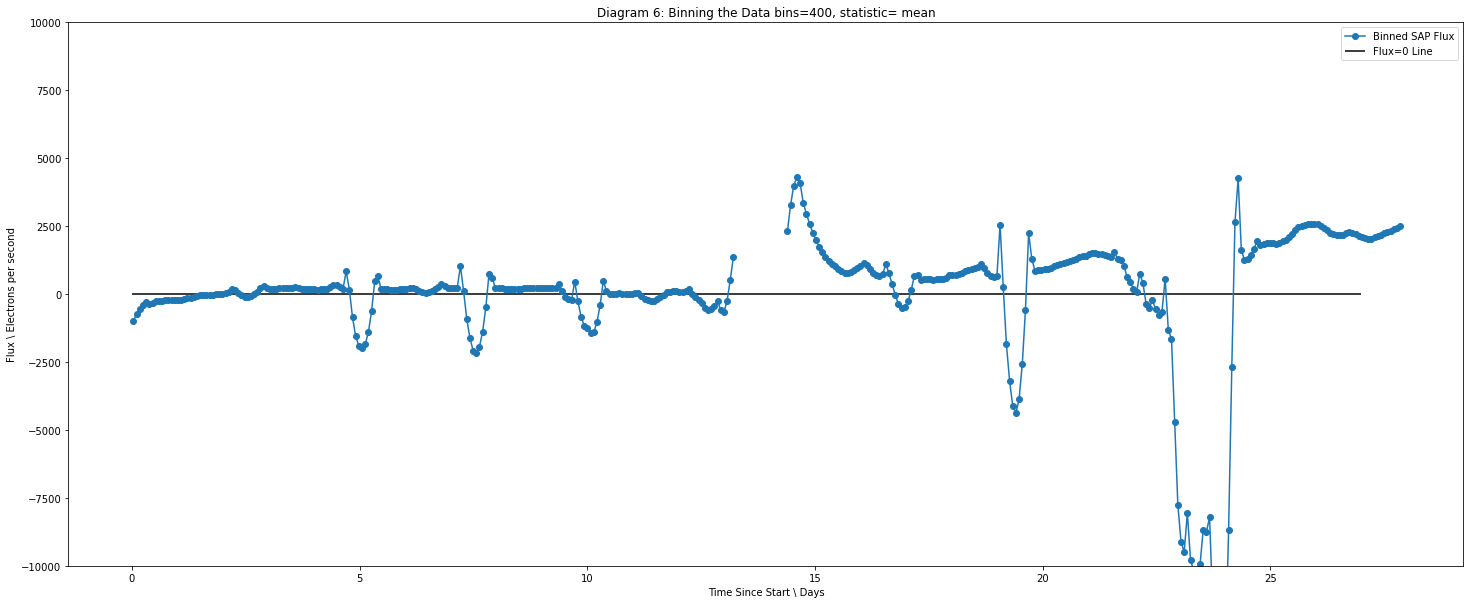

In [ ]:
Flux_bins, Time_bin_edges, binnumber = sp.stats.binned_statistic(timeNoNan,Flux_Filter,statistic="mean",bins= 400)
bin_width = (Time_bin_edges[1] - Time_bin_edges[0])
Time_bin_centers = Time_bin_edges[1:] - bin_width/2
plt.title("Diagram 6: Binning the Data bins=400, statistic= mean")
plt.hlines(0,0,27,"k",zorder=2,label="Flux=0 Line")
#plt.plot(timeNoNan,Flux_detr,"o",label="Detrended SAP Flux",zorder=1)
plt.plot(Time_bin_centers,Flux_bins,"-o",label="Binned SAP Flux")
plt.ylabel(r"Flux \ Electrons per second")
plt.xlabel(r"Time Since Start \ Days")
plt.ylim(-1e4,1e4)
plt.legend()
plt.savefig("BinData.jpg")

While these might look like transits to us this actually arent the Transits the Problem is the Sav-Gol filter tends to overfit the Data in certain cases this here is one of them we have to use a different Method to avoid these Artifacts caused by the Sav Gol Filter.

## Different Detrending Methods
we have tried detrending the Data by using a fit of a 2nd Order Polynomial. Let us now compare different Detrending methodss instead as our Data has Artifacts from the Sav-Gol Filter. For this we will also now use the PDCSAP Flux as it is corrected for the Instrumental errors allready which will make our lives easier.

In [ ]:
import wotan
from wotan import flatten
from astropy.stats import sigma_clip
from astropy.timeseries import aggregate_downsample
from sklearn.exceptions import ConvergenceWarning
import warnings

In [ ]:
TS = TimeSeries.read("Data/hlsp_tess-data-alerts_tess_phot_00261136679-s01_tess_v1_lc.fits",format="tess.fits",) #Get all the Values into a Time Series
Flux_TS = TS["time","pdcsap_flux"] # Just the PDCSAP FLux to make the Time Series Smaller for Simplicity Sake and for Speed

D:\Software\Programming\Anaconda\lib\site-packages\astropy\timeseries\io\kepler.py:77: UserWarning: Ignoring 815 rows with NaN times
  warnings.warn('Ignoring {} rows with NaN times'.format(np.sum(nans)))


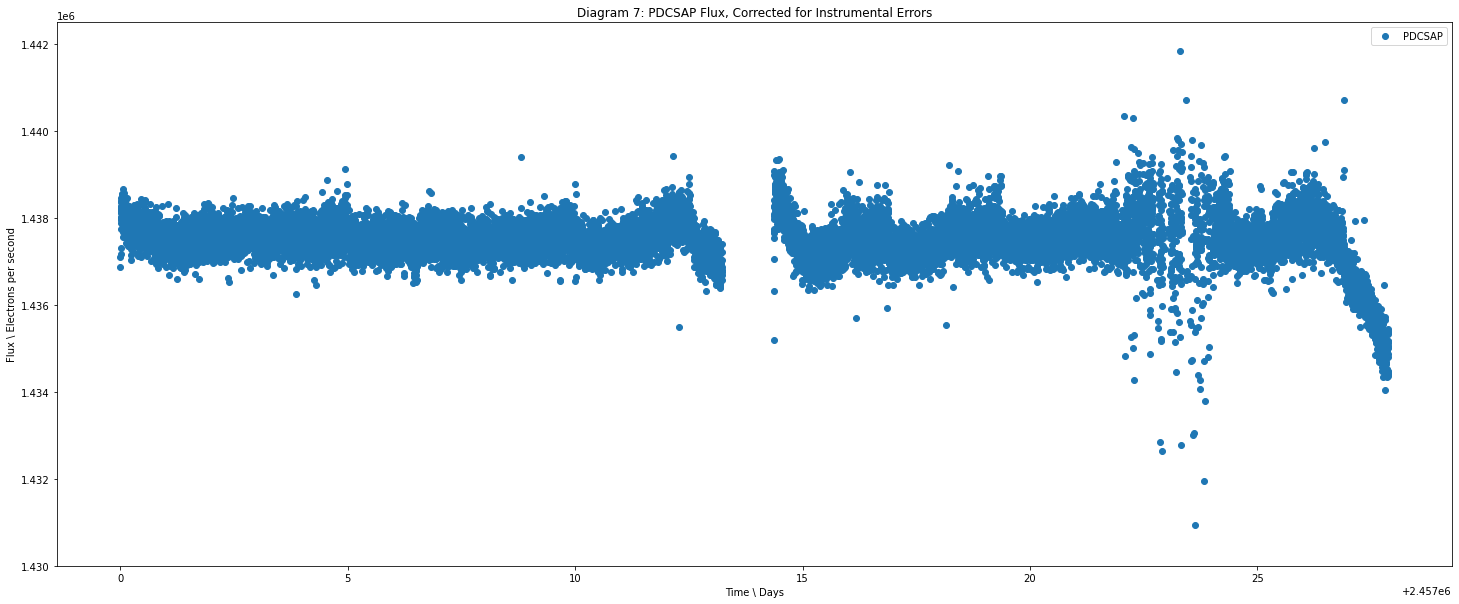

In [ ]:
plt.title("Diagram 7: PDCSAP Flux, Corrected for Instrumental Errors")
plt.plot(Flux_TS.time.jd-t0,Flux_TS["pdcsap_flux"],"o",label="PDCSAP")
plt.ylim(1.43e6,1.4425e6)
plt.ylabel(r"Flux \ Electrons per second")
plt.xlabel(r"Time \ Days")
plt.legend()

In [ ]:
clip = sigma_clip(Flux_TS["pdcsap_flux"]) # were sigma Clipping the data to remove outliers we clip at 3 Sigma
mask = ~np.ma.getmask(clip)
Flx = TimeSeries(time=Flux_TS["time"][mask],data=Flux_TS["pdcsap_flux"][mask].reshape(-1,1),names=["Flux"])

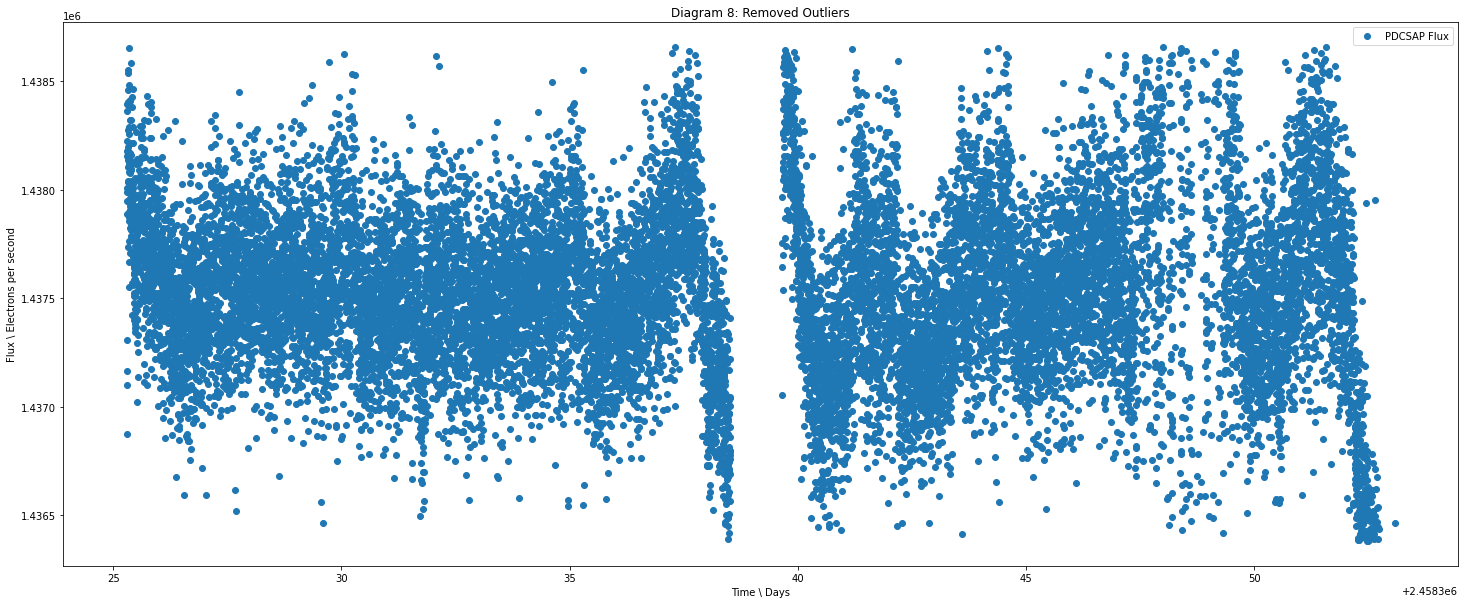

In [ ]:
plt.title("Diagram 8: Removed Outliers")
plt.plot(Flx.time.jd,Flx["Flux"],"o",label="PDCSAP Flux")
plt.ylabel(r"Flux \ Electrons per second")
plt.xlabel(r"Time \ Days")
plt.legend()

### Detrending Comparison
We will now compare different detrending methods with the WOTAN Library from [Hippke et al. (2019, AJ, 158, 143)](https://ui.adsabs.harvard.edu/abs/2019AJ....158..143H/abstract)

In [ ]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    Flx["GP-exp"],trendgp = flatten(Flx.time.jd, Flx["Flux"],method='gp',kernel="squared_exp",kernel_size=10,return_trend=True)
    Flx["biweight"],trendbi = flatten(Flx.time.jd, Flx["Flux"] ,method='biweight',return_trend=True)
    Flx["matern"],trendmat = flatten(Flx.time.jd, Flx["Flux"] ,method='gp',kernel="matern",kernel_size=10,return_trend=True)
    Flx["ridge"],trendridge = flatten(Flx.time.jd, Flx["Flux"] ,method='ridge',kernel_size=10,return_trend=True)
    Flx["period"],trendp = flatten(Flx.time.jd, Flx["Flux"] ,method='gp',kernel="periodic_auto",kernel_size=10,return_trend=True)

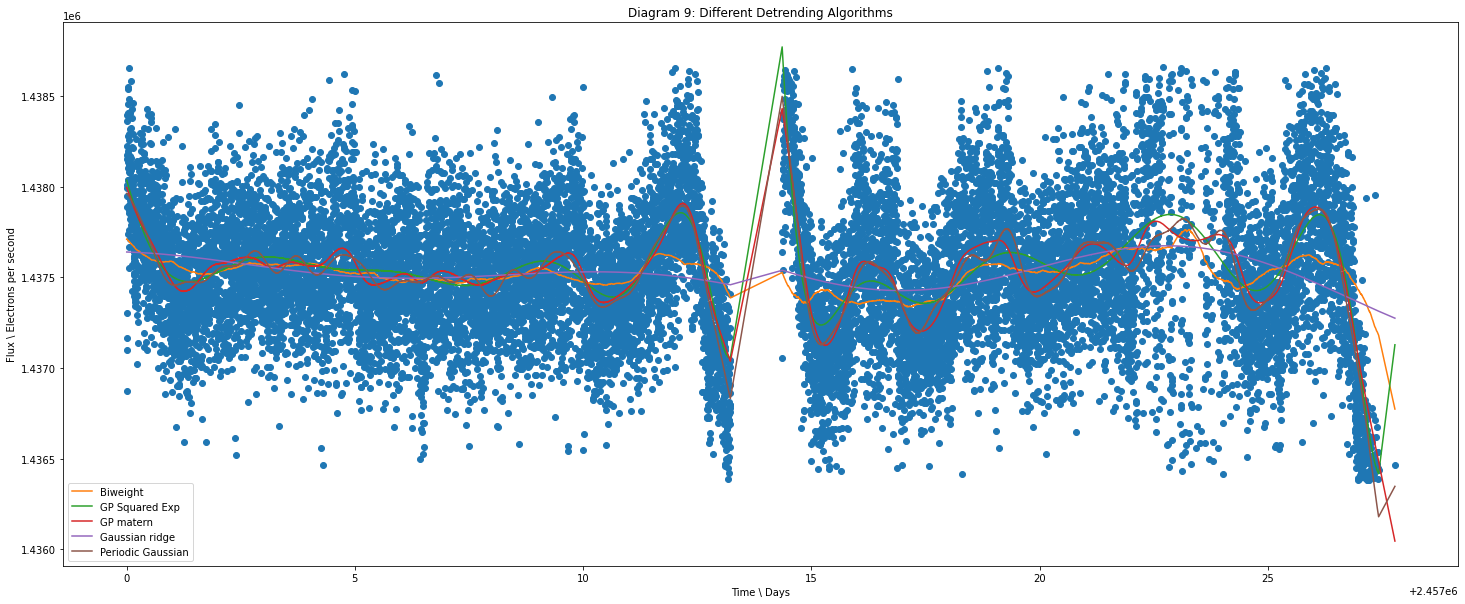

In [ ]:
#plt.plot(Flx.time.jd,Flx["biweight"],".")
plt.title("Diagram 9: Different Detrending Algorithms")
plt.plot(Flx.time.jd-t0,Flx["Flux"],"o")
plt.plot(Flx.time.jd-t0,trendbi,label="Biweight")
plt.plot(Flx.time.jd-t0,trendgp,label="GP Squared Exp")
plt.plot(Flx.time.jd-t0,trendmat,label="GP matern")
plt.plot(Flx.time.jd-t0,trendridge,label="Gaussian ridge")
plt.plot(Flx.time.jd-t0,trendp,label="Periodic Gaussian")

plt.ylabel(r"Flux \ Electrons per second")
plt.xlabel(r"Time \ Days")
plt.legend()

WE can see here the different Detrending Lines created by the Detrending Methods we will from now on focus on the Gaussian Process (GP) detrending method as that is a often used Method for the Transit Method. If we would choose to use another Method we would need to take caution that the Detrending Line follows the General trend and not just the Small wobbles, aka. we want to have long wide curves instead of small jittery curves.

We will now continue with th GP Kernel and alternate abit with the GP Kernel Size to find an ideal size for our Problem. As said before we want long wide curves(Long Periods)

In [ ]:
test = pd.DataFrame(index=Flx.time.jd)
test["Test"] = Flx["Flux"]

In [ ]:
Flx_gp = Flx["time","Flux"]
trendgp = pd.DataFrame(index=Flx.time.jd)
kern_size = [1,2,4,6,8,20]
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    for i in kern_size:
        Flx_gp["gp"+str(i)],trendgp[str(i)] = flatten(Flx.time.jd, Flx["Flux"],method='gp',kernel="squared_exp",kernel_size=i,return_trend=True)

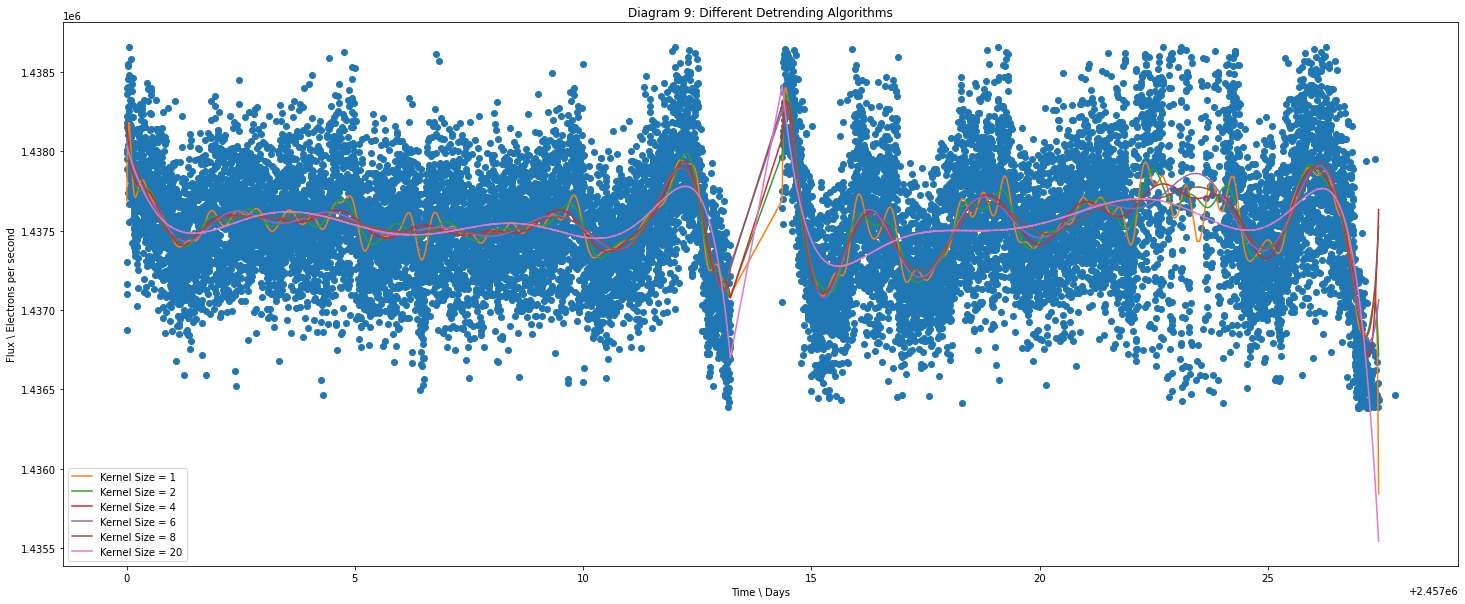

In [ ]:
plt.title("Diagram 9: Different Detrending Algorithms")
plt.plot(Flx.time.jd-t0,Flx["Flux"],"o")

for i in kern_size:
    plt.plot(Flx.time.jd[:-1]-t0,trendgp[str(i)].values[:-1],label="Kernel Size = " + str(i) )

plt.ylabel(r"Flux \ Electrons per second")
plt.xlabel(r"Time \ Days")
plt.legend()

We choose the Kernel Size of 4 as this seems to be a reasonable Choice we now save the detrended Flux Values in the Time Series

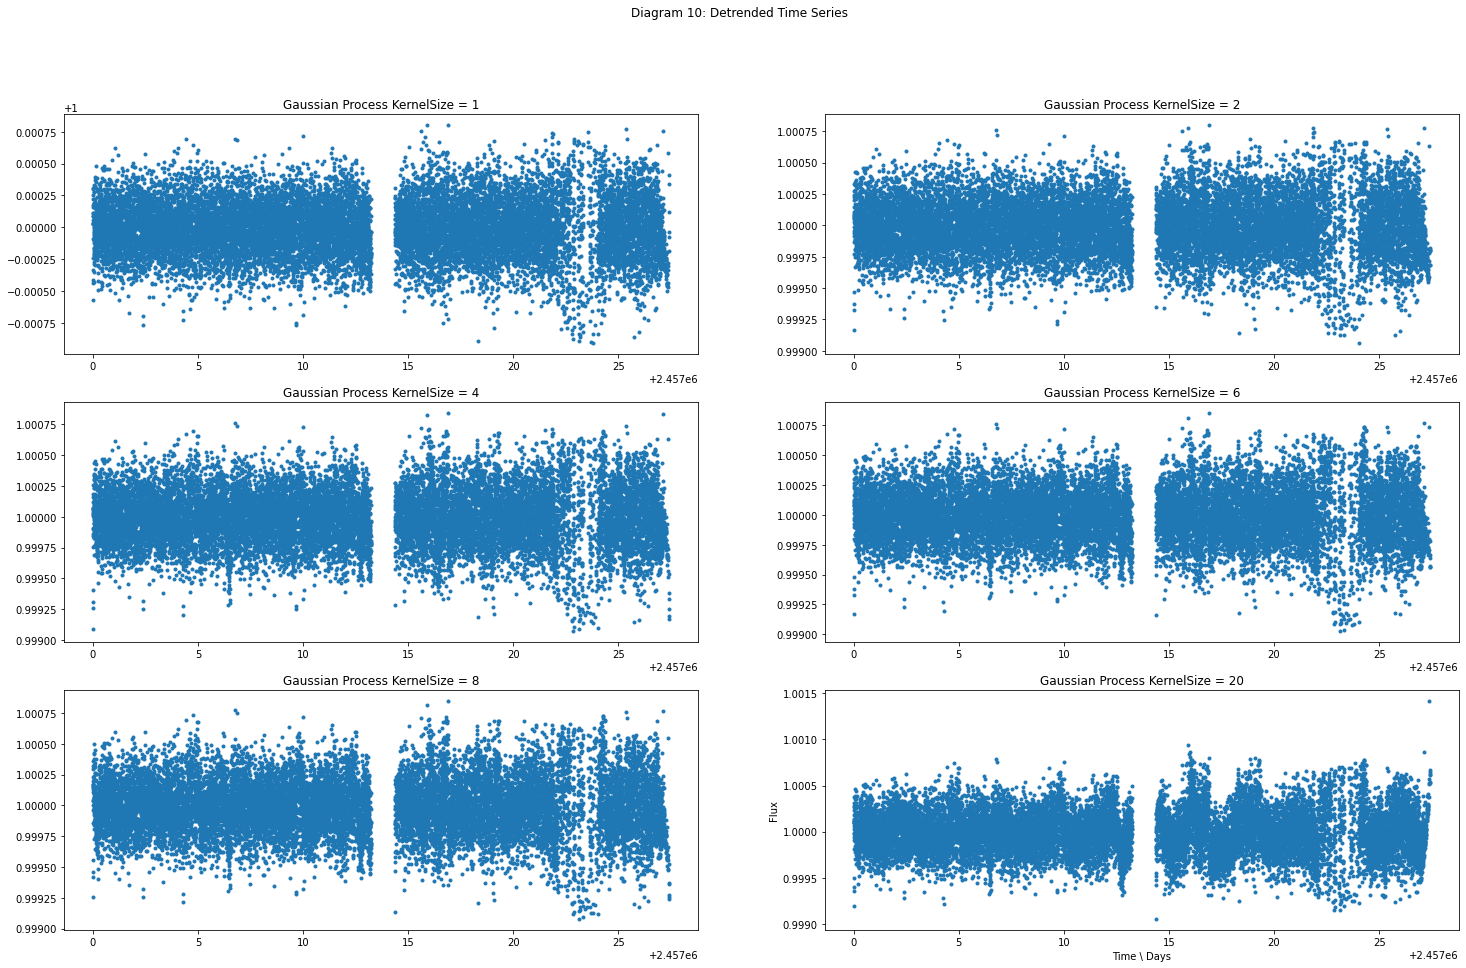

In [ ]:
fig_de,ax_de = plt.subplots(3,2,figsize=(25,15))
plt.suptitle("Diagram 10: Detrended Time Series")
i = 0
for ax_1 in ax_de:
    for ax in ax_1:
        ax.plot(Flx.time.jd[:-1]-t0,Flx_gp["gp"+str(kern_size[i])][:-1],".")
        ax.set_title("Gaussian Process KernelSize = " + str(kern_size[i]))
        plt.ylabel("Flux")
        plt.xlabel("Time \ Days")
        i +=1

after Choosing the Kernel Size of 4 we now want to reduce our Sample size abit so we use Astropy to downsample our Time Series to combine our Data Points into less points. This give the following Diagram.

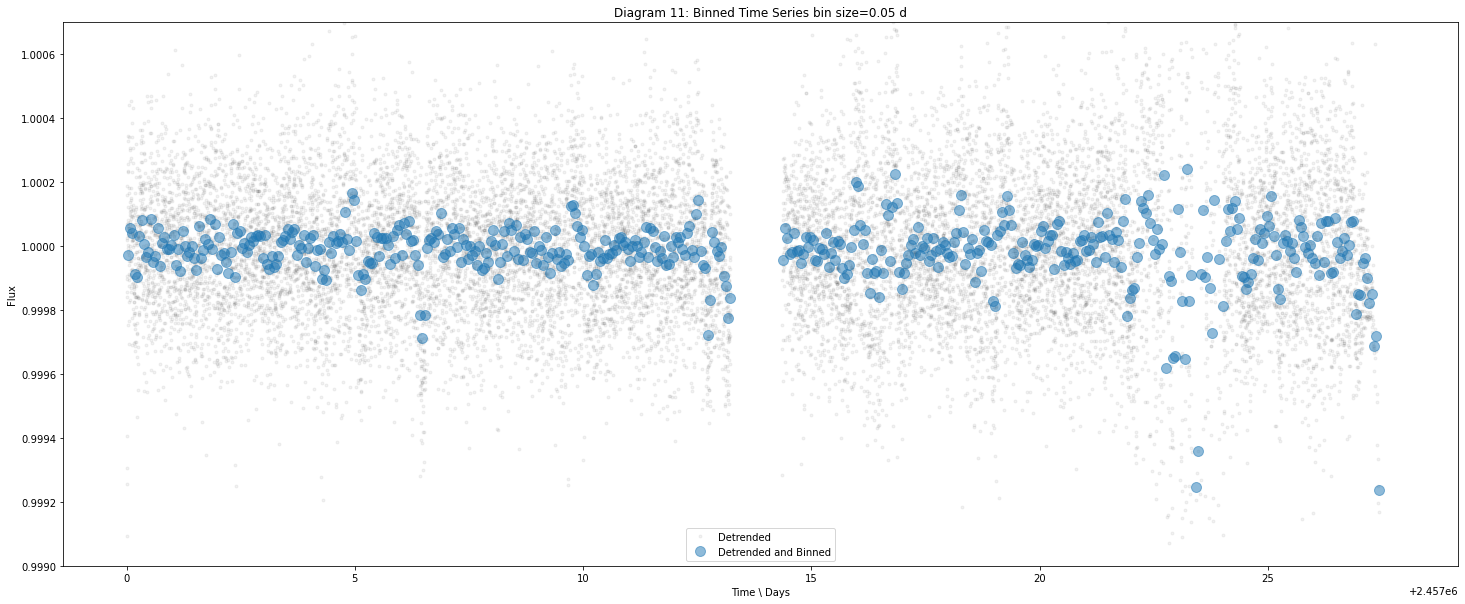

In [ ]:
Flx_gp.primary_key = "time"
index = "gp4"
bin_test = aggregate_downsample(Flx_gp,time_bin_size=0.05*u.d)

plt.title("Diagram 11: Binned Time Series bin size=0.05 d")
plt.plot(Flx_gp.time.jd-t0,Flx_gp[index],".k",alpha=0.05,label="Detrended")
plt.plot(bin_test.time_bin_center.jd-t0,bin_test[index],"o",markersize=10,alpha=0.5,label="Detrended and Binned")

plt.ylabel("Flux")
plt.xlabel("Time \ Days")
plt.ylim(0.9990,1.0007)
plt.legend()

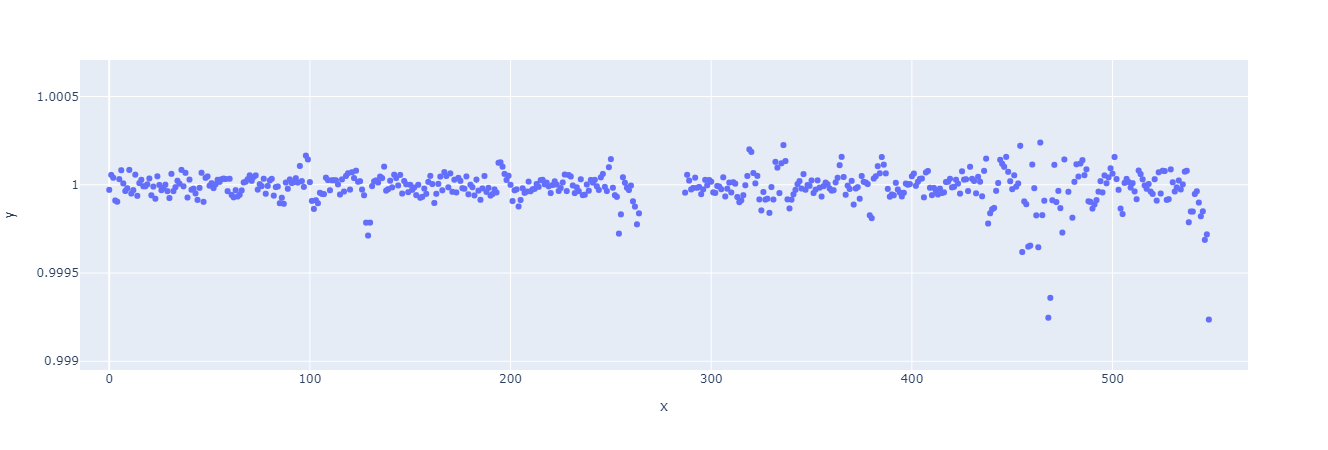

In [ ]:
from plotly import express as px
px.scatter(y=bin_test[index])#,x=bin_test.time_bin_center.jd-t0-2457000)

With the help of Plotly for interactive Plots we can now pick out the Indices of two of our Transits by hand. The Indices are (129,254) we use this to calculate a very rough Period

In [ ]:
period = np.float64(bin_test.time_bin_center.jd[129]) - np.float64(bin_test.time_bin_center.jd[254])
period

-6.25

Finally we fold our Data with this Period and get a Phase Diagram of the Transit.

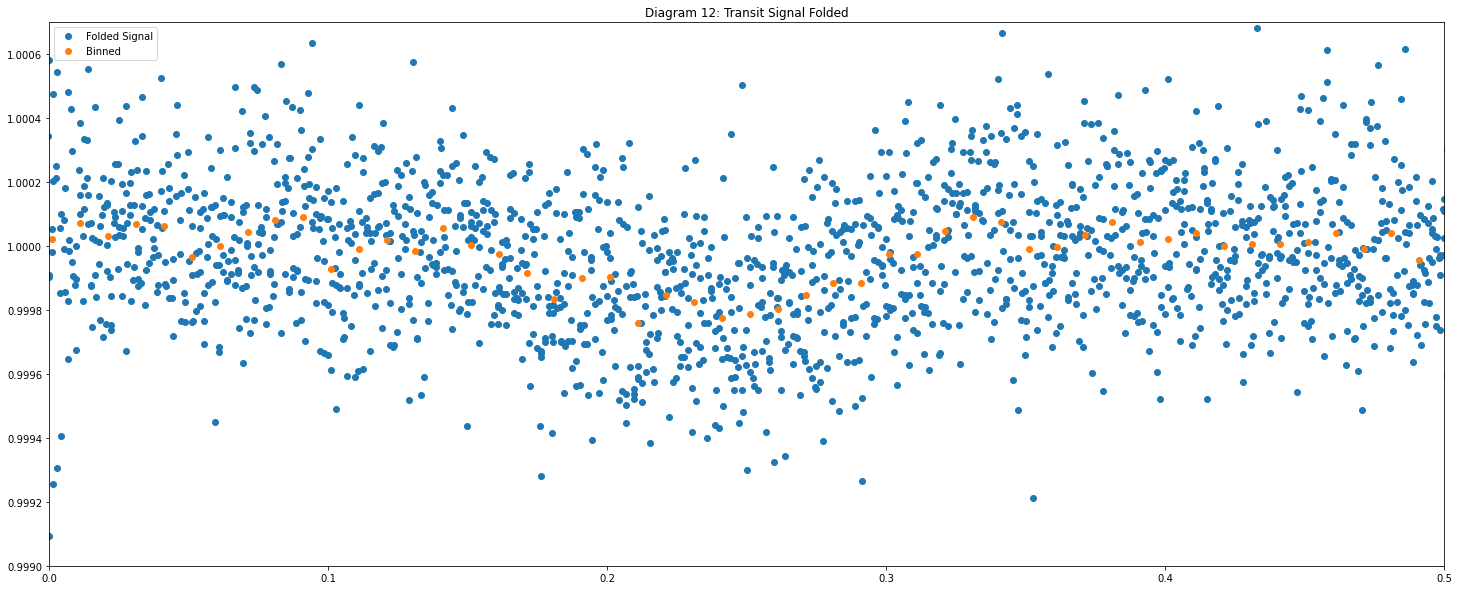

In [ ]:

Flx_fold = Flx_gp.fold(period=6.25*u.d)
bin_transit = aggregate_downsample(Flx_fold,time_bin_size=0.01*u.d)
plt.title("Diagram 12: Transit Signal Folded")
plt.plot(Flx_fold.time.jd,Flx_fold["gp4"],"o",label="Folded Signal")
plt.plot(bin_transit.time_bin_center.jd,bin_transit["gp4"],"o",label="Binned")
plt.ylim(0.9990,1.0007)
plt.xlim(0,0.5)
plt.legend()

As we can see this is not the best Phase Diagram of the Transit, the Transit is not very clear. To make the Transit clearer there is two main Steps we can take. 

1. a better aproximation of the Period 
2. We filter the Data Multiple times with a detrending

We will take those steps in [Transits_Multi_Filter](Transits_Multi_Filter.ipynb)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b43e0c11-0b97-4e39-8716-b644d99b659d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>